In [1]:
pip install seaborn
import pandas as pd
import numpy as np
import textblob
import nltk
import time

import enchant #spelling
import itertools

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re 
from textblob import TextBlob, Word, Blobber
#from spellchecker import SpellChecker
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer 

nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn import linear_model,svm
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from collections import Counter


nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfTransformer 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

ModuleNotFoundError: No module named 'seaborn'

In [5]:
data = pd.read_csv("nlp_final_data.csv")
a=[0,5];
data=data.iloc[:,a]


In [6]:
data

,target,text
0,1,Headache and yardwork = miserable hell
1,1,I woke up late and I feel like poo...*sigh* it...
2,1,"Just watched a man date come to an end, it was..."
3,0,Had fun at the carnival with the bff middle s...
4,1,wishes he would love me back!!
...,...,...
113128,0,@kevinkevink Get on &quot;Raging Spirits&quot;...
113129,1,@cafflo You know what to do when you feel slee...
113130,1,@mandyconforth they moved me away from the dog...
113131,1,@carthalis yeah I've only seen (not read) Em...


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    59053
0    54080
Name: target, dtype: int64

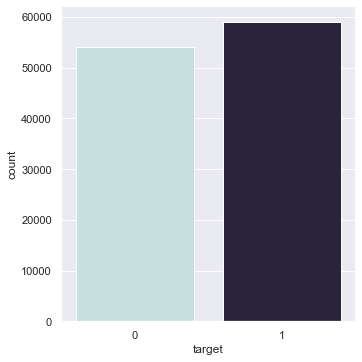

In [7]:
sns.set(font_scale=1)
sns.catplot("target", data=data, kind="count", palette="ch:start=.2,rot=-.3", height=5)
data['target'].value_counts()

# Cleaning data

In [8]:
data['tidy'] = data['text'].str.replace("[^A-Za-z']+", " ")

<ipython-input-8-6513f6c03230>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tidy'] = data['text'].str.replace("[^A-Za-z']+", " ")


In [9]:
d = enchant.Dict("en_US")
def arrangeSentence(sentence):
    sentence=sentence.lower()
    sentence=sentence.split()
    for i in range(len(sentence)):
        if d.check(''.join(''.join(s)[:2] for _, s in itertools.groupby(sentence[i]))):
            sentence[i]=''.join(''.join(s)[:2] for _, s in itertools.groupby(sentence[i]))
        else:
            sentence[i]=''.join(''.join(s)[:1] for _, s in itertools.groupby(sentence[i]))
    sentence=' '.join(sentence)
    return sentence

In [10]:
stopwordlist = set(stopwords.words("english"))
to_remove = ['doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
             'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't","you",
            "your", "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
             'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves']
stopwordlist = set(stopwords.words('english')).difference(to_remove)

In [12]:
lemmatizer = WordNetLemmatizer()
for i in range(8799):
    current=data.iloc[i,2]
    current=str(TextBlob(current)).lower().replace("  "," ")
    #type(current)
    current = arrangeSentence(current)
    current = ' '.join([lemmatizer.lemmatize(w) for w in current.split()])
    print(current)
    sentence1=[word for word in current.split() if word not in stopwordlist]
    sentence2=[word for word in sentence1 if len(word)>2]
    current = " ".join(sentence2)
    data.loc[i,'tidy']=str(current)

headache yardwork miserable hell
woke late feel like poo sigh it's work
watched man date come end cute btw angelreds lost his phone
fun carnival middle school jid slut day gonna visit husband miss him
wish would love back
tha lol yesire enjoyable perfect intro known would invited you
bed andaming gagawin bukas nightie htp plurk com pwqf
rodafowa filling quick you i'm superdupergil i'm your friend list
day
godamnit filming graduation hangover
tmth exam dont start may cant bothered much moment good luck you'll great
stretztalk jaysonjphilips wasn't i'l take word y'all need get strolling competition cause
washing machine broke
nick carter fun
eckafatcat hello sexy give right soon you love you
yes folk back school tomorrow however thursday
gud mornin gotz stomach acherz
breakingnews dead metro accident
brap dropping techno tonight zooming cavern support freland till busy old evening
marie looking forward sat tmr
partyinmypants aside stressed good yourself
carewcha took week lose damned son

# Counting number of tokens

In [13]:
#tokenize the tweet data
tt = TweetTokenizer()
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
ps = PorterStemmer()

In [14]:
# return word_tokenize(text)
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words


In [15]:
lemmatizer = WordNetLemmatizer()

In [17]:
data['stemmed']=data['tidy'].apply(tt.tokenize)
data['stemmed'] = data['stemmed'].apply(stemming)

In [18]:
data

,target,text,tidy,stemmed
0,1,Headache and yardwork = miserable hell,headache yardwork miserable hell,"[headach, yardwork, miser, hell]"
1,1,I woke up late and I feel like poo...*sigh* it...,woke late feel like poo sigh it's work,"[woke, late, feel, like, poo, sigh, it', work]"
2,1,"Just watched a man date come to an end, it was...",watched man date come end cute btw angelreds l...,"[watch, man, date, come, end, cute, btw, angel..."
3,0,Had fun at the carnival with the bff middle s...,fun carnival middle school jid slut day gonna ...,"[fun, carniv, middl, school, jid, slut, day, g..."
4,1,wishes he would love me back!!,wish would love back,"[wish, would, love, back]"
...,...,...,...,...
113128,0,@kevinkevink Get on &quot;Raging Spirits&quot;...,kevinkevink Get on quot Raging Spirits quot a...,"[kevinkevink, get, on, quot, rage, spirit, quo..."
113129,1,@cafflo You know what to do when you feel slee...,cafflo You know what to do when you feel slee...,"[cafflo, you, know, what, to, do, when, you, f..."
113130,1,@mandyconforth they moved me away from the dog...,mandyconforth they moved me away from the dog...,"[mandyconforth, they, move, me, away, from, th..."
113131,1,@carthalis yeah I've only seen (not read) Em...,carthalis yeah I've only seen not read Empire...,"[carthali, yeah, i'v, onli, seen, not, read, e..."


In [19]:
words = Counter()
for idx in data.index:
    words.update(data.loc[idx, "stemmed"])

#words.most_common()

In [20]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(900)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('go', 9810),
 ("i'm", 8957),
 ('day', 8319),
 ('get', 7878),
 ('not', 7283),
 ('work', 6912),
 ('wa', 6862),
 ('good', 6493),
 ('thi', 6261),
 ('like', 5853),
 ('love', 5578),
 ('today', 5140),
 ('quot', 4973),
 ("it'", 4786),
 ('time', 4762),
 ('back', 4558),
 ('http', 4347),
 ('got', 4312),
 ('want', 4175),
 ('one', 4050),
 ('thank', 3962),
 ('miss', 3896),
 ('com', 3872),
 ('know', 3754),
 ('feel', 3712),
 ('think', 3689),
 ('lol', 3657),
 ('realli', 3566),
 ('see', 3532),
 ('night', 3357),
 ("can't", 3257),
 ('hope', 3226),
 ('im', 3221),
 ('amp', 3180),
 ('u', 3175),
 ('still', 3168),
 ('need', 3140),
 ('well', 3139),
 ('twitter', 3109),
 ("'", 3056),
 ('watch', 2999),
 ('make', 2964),
 ('new', 2882),
 ('home', 2881),
 ('look', 2863),
 ('come', 2734),
 ('morn', 2713),
 ('last', 2669),
 ('much', 2662),
 ('wish', 2632),
 ('ha', 2562),
 ('oh', 2551),
 ('sleep', 2515),
 ('great', 2490),
 ('tomorrow', 2480),
 ('wait', 2121),
 ('happi', 2109),
 ('tri', 2090),
 ('fun', 2075),
 ('follow

In [21]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=5 
    max_occurences=5000 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    #print(whitelist)
    
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "stemmed"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    wordlist

In [22]:
word_list(data)

In [23]:
words = pd.read_csv("wordlist.csv")

In [24]:
words

,idx,word,occurrences
0,0,quot,4973
1,1,it',4786
2,2,time,4762
3,3,back,4558
4,4,http,4347
...,...,...,...
8713,8713,month',6
8714,8714,destroytwitt,6
8715,8715,oohh,6
8716,8716,symphoni,6


# Dividing data into training and testing

In [27]:
X_train, X_test, y_train, y_test  = train_test_split(
        data['tidy'], 
        data.iloc[:,0],
        train_size=0.80, 
        random_state=1234)

In [28]:
y_train

34548    0
15315    0
87194    1
34374    0
68181    1
        ..
89460    0
60620    0
34086    0
58067    0
92975    1
Name: target, Length: 90506, dtype: int64

# First Approach- Dividing data according to TF-IDF 

In [29]:
def scikit_TFIDF(m,n,Total_clean_train,Total_clean_test):
    vectorizer = CountVectorizer(min_df=1,max_features=m,ngram_range=(1,n))
    analyze = vectorizer.build_analyzer
    X_train = vectorizer.fit_transform(Total_clean_train).toarray()
    X_test = vectorizer.transform(Total_clean_test).toarray()
    transformer = TfidfTransformer()
    tfidf_train=transformer.fit_transform(X_train).toarray()
    tfidf_test=transformer.transform(X_test).toarray()
    return tfidf_train,tfidf_test

In [30]:
X_train,X_test=scikit_TFIDF(2000 ,3,X_train,X_test)

In [31]:
X_train.shape

(90506, 2000)

In [32]:
from time import process_time

In [35]:
logisticReg = linear_model.LogisticRegression(multi_class='ovr')

train_start_time = process_time()
logisticReg.fit(X_train, y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

logisticReg_prediction = logisticReg.predict(X_test)
logisticReg_accuracy = accuracy_score(y_test, logisticReg_prediction)
print("Training accuracy Score    : ",logisticReg.score(X_train, y_train))
print("Testing accuracy Score : ",logisticReg_accuracy )
print(classification_report(logisticReg_prediction, y_test))

Training time : 26.671875
Training accuracy Score    :  0.7824674607208362
Testing accuracy Score :  0.7674459716268175
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     10929
           1       0.77      0.78      0.78     11698

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627



# Model 1) LOGISTIC REGRESSION

In [30]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(X_train, y_train)
Y_predict=(logisticReg.predict(X_test))
print(classification_report((Y_predict),y_test))

end = time.time()
print(end - start, " ms")


              precision    recall  f1-score   support

           0       0.76      0.75      0.76     10931
           1       0.77      0.78      0.78     11696

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

24.996414184570312  ms


# model 2) SUPPORT VECTOR MACHINE

In [36]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, Y_SVC_linear_predic)
print(classification_report(Y_SVC_linear_predic,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     11051
           1       0.77      0.78      0.77     11576

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

3.0461602210998535  ms


# Model 3) Naive Bayes Model

In [38]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

train_start_time = process_time()
naiveByes_clf.fit(X_train, y_train)
train_end_time = process_time()
print(f"Training time : {train_end_time-train_start_time}")

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test, NB_prediction)
print("Training accuracy Score    : ", naiveByes_clf.score(X_train, y_train))
print("Testing accuracy Score : ", NB_accuracy )
print(classification_report(NB_prediction, y_test))

Training time : 0.890625
Training accuracy Score    :  0.7586237376527523
Testing accuracy Score :  0.7511822159367127
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      9927
           1       0.80      0.74      0.77     12700

    accuracy                           0.75     22627
   macro avg       0.75      0.75      0.75     22627
weighted avg       0.76      0.75      0.75     22627



# Model 4) Random forest 


In [39]:
start = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_pred,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.68      0.67      0.67     11008
           1       0.69      0.70      0.69     11619

    accuracy                           0.68     22627
   macro avg       0.68      0.68      0.68     22627
weighted avg       0.68      0.68      0.68     22627

494.6199607849121  ms


# Model 5) Stochastic Gradient Descent-SGD Classifier

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

train_start_time = process_time()
sgd_clf.fit(X_train,y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train, y_train))
print("Testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training time : 15.25
Training accuracy Score    :  0.7816166883963495
Testing accuracy Score :  0.7690811861934856
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     11075
           1       0.77      0.78      0.78     11552

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627



In [52]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [svm_accuracy, logisticReg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.769081
1,Logistic Regression,0.767446
0,Support Vector Machines,0.766209
3,Naive Bayes,0.751182
2,Random Forest,0.682813


# Second approach- Dividing the data according to Bag of words approach

In [41]:
count_vectorizer = CountVectorizer(min_df=10,max_features=2000,ngram_range=(1,4))
X = count_vectorizer.fit_transform(data['tidy']).toarray() 
Y = data.iloc[:,0].values

In [42]:
count_vectorizer

CountVectorizer(max_features=2000, min_df=10, ngram_range=(1, 4))

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

# Bag of words 
# Model 1) Logistic regression


In [45]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(X_train, y_train)
Y_predict=logisticReg.predict(X_test)
print(classification_report(Y_predict,y_test))
end = time.time()
print(end - start, " ms")

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      0.75      0.76     11280
           1       0.76      0.79      0.77     11347

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

38.121819496154785  ms


# Model 2) SVM

In [46]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(X_test)
print(classification_report(Y_SVC_linear_predic,y_test))
end = time.time()
print(end - start, " ms")

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.78      0.75      0.76     11360
           1       0.76      0.79      0.77     11267

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

37.87321496009827  ms


# Bag of words Naive Bayes

In [47]:
start = time.time()
gnb = GaussianNB()
Y_pred_Bayes = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(Y_pred_Bayes,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.84      0.65      0.73     14022
           1       0.58      0.80      0.67      8605

    accuracy                           0.70     22627
   macro avg       0.71      0.72      0.70     22627
weighted avg       0.74      0.70      0.71     22627

7.229698896408081  ms


# Model 4) Random forest

In [48]:
start = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_pred,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.68      0.66      0.67     11047
           1       0.69      0.70      0.69     11580

    accuracy                           0.68     22627
   macro avg       0.68      0.68      0.68     22627
weighted avg       0.68      0.68      0.68     22627

394.45958518981934  ms
